In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set()
df = pd.read_pickle('male_test.pkl')
dft = pd.read_pickle('male_train.pkl')
import os
import pickle
from glob import glob
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from scipy import linalg

In [2]:
df_test = {}
df_test['Unnamed: 0'] = df.iloc[0].dataframe['Unnamed: 0'].to_list()
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_output_age.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)
df_test['target_age'] = df.iloc[0].dataframe.target_age.to_list()

In [3]:
df_testA, df_testB = train_test_split(df_test, test_size=0.5, random_state=1)
subjects_testA = df_testA['Unnamed: 0'].to_list()
subjects_testB = df_testB['Unnamed: 0'].to_list()
df_testA = df_testA.drop(labels='Unnamed: 0', axis=1)
df_testB = df_testB.drop(labels='Unnamed: 0', axis=1)

df_train = df_testA
df_test_original = df_test.drop(labels='Unnamed: 0', axis=1)
df_test = df_testB

In [4]:
def plot_PCA(df, modalities=None, only_clusters=False):

    if modalities == None:
        M = df.to_numpy()[:,:-1]
        labels = df.columns.to_list()[:-1]
    else:
        M = []
        for modality in modalities:
            M.append(np.array(df[modality].to_list()))
        M = np.array(M).T
        labels = modalities

    feature_means = np.mean(M, axis=0)
    M = np.subtract(M, feature_means)

    print(M.shape)
    
    u,s,vh = linalg.svd(M, full_matrices=False)
    
    print(u.shape, vh.shape, s.shape)
    
    percVariance = np.cumsum(s**2)*100 / np.sum(s**2)
    
    if only_clusters==False:

        plt.figure(figsize=(7.2, 7.2))
        plt.plot(s)
        plt.xlabel('Singurlar Value Number/Rank')
        plt.ylabel('Singural Value Intensity')

        plt.figure(figsize=(7.2, 7.2))
        plt.plot(percVariance)    
        plt.xlabel('Singurlar Value Number/Rank')
        plt.ylabel('Percentage (%) Variance')

        fig, ax = plt.subplots(figsize=(7.2, 7.2))
        ax.scatter(u[:,0], u[:,1], facecolors='none', edgecolors='k')
        # ax.scatter(u[0,:], u[1,:], facecolors='none', edgecolors='k')
        xlabel = 'PCA Component 1 (' + str(np.around(percVariance[0], decimals=2)) + '%)'
        ylabel = 'PCA Component 2 (' + str(np.around(percVariance[1] - percVariance[0], decimals=2)) + '%)'
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        fig, ax = plt.subplots(figsize=(7.2, 7.2))
        ax.scatter(vh[0, :], vh[1,:], facecolors='none', edgecolors='k')
        for i, txt in enumerate(labels):
            ax.annotate(txt, (vh[0, :][i], vh[1,:][i]),  textcoords="offset points", xytext=(0,10), ha='center')
        xlabel = 'PCA Component 1 (' + str(np.around(percVariance[0], decimals=2)) + '%)'
        ylabel = 'PCA Component 2 (' + str(np.around(percVariance[1] - percVariance[0], decimals=2)) + '%)'
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
    else:
        
        fig, ax = plt.subplots(figsize=(7.2, 7.2))
        ax.scatter(vh[0, :], vh[1,:], facecolors='none', edgecolors='k')
        for i, txt in enumerate(labels):
            ax.annotate(txt, (vh[0, :][i], vh[1,:][i]),  textcoords="offset points", xytext=(0,10), ha='center')
        xlabel = 'PCA Component 1 (' + str(np.around(percVariance[0], decimals=2)) + '%)'
        ylabel = 'PCA Component 2 (' + str(np.around(percVariance[1] - percVariance[0], decimals=2)) + '%)'
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        

# Analysis for whole test dataset

(4365, 57)
(4365, 57) (57, 57) (57,)


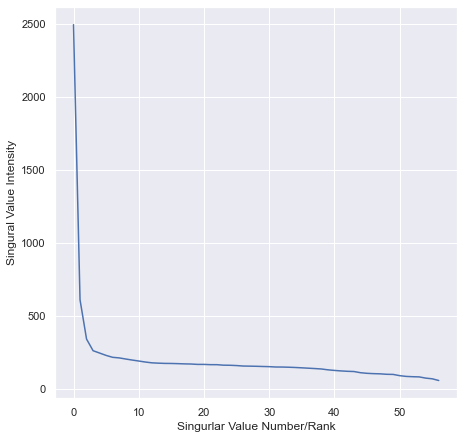

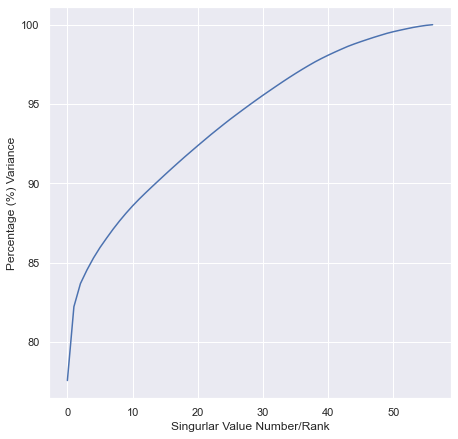

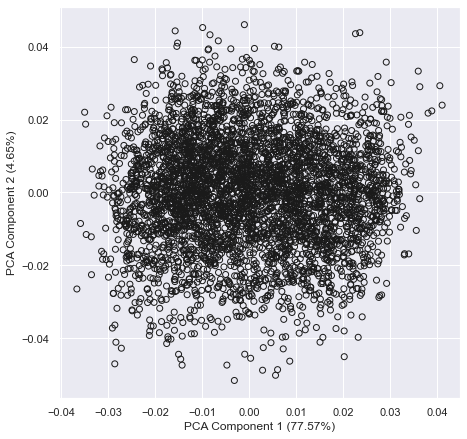

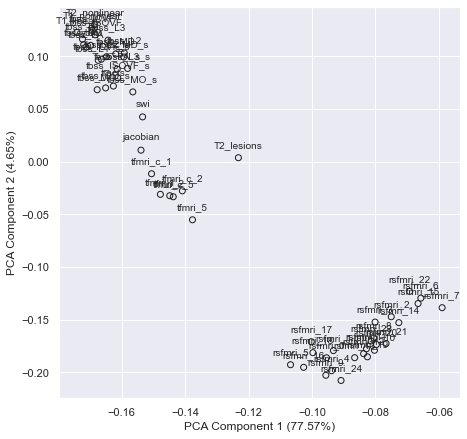

In [5]:
plot_PCA(df_test_original)

In [6]:
df = df_test_original
modalities = None

if modalities == None:
    M = df.to_numpy()[:,:-1]
    labels = df.columns.to_list()[:-1]
else:
    M = []
    for modality in modalities:
        M.append(np.array(df[modality].to_list()))
    M = np.array(M).T
    labels = modalities

feature_means = np.mean(M, axis=0)
M = np.subtract(M, feature_means)


u,s,vh = linalg.svd(M, full_matrices=False)
percVariance = np.cumsum(s**2)*100 / np.sum(s**2)

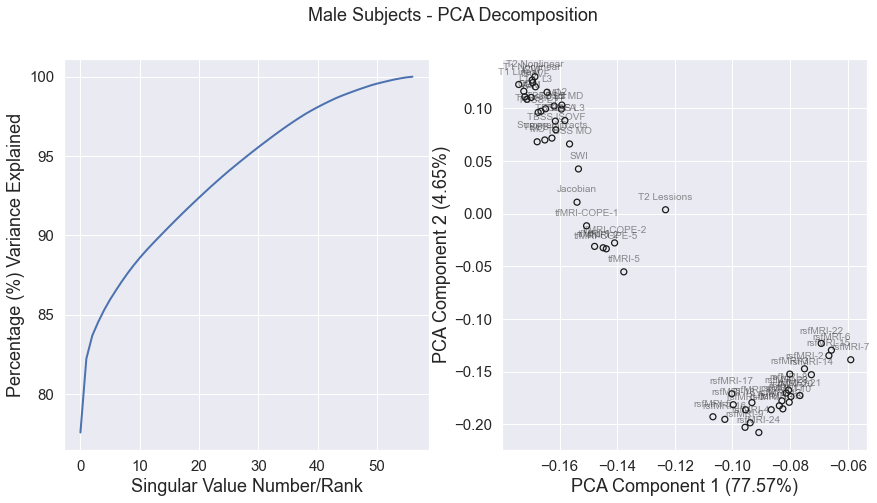

In [7]:
ncols=2
nrows=1
sz=7.2
title_font_size=18
ticks_font_size=15
legend_font = 18

fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*sz,nrows*sz))

axes = axes.ravel()


namesNN = [
    'T1 Nonlinear', 'T1 Linear', 'Jacobian', 'VBM', 'T2 Nonlinear', 'T2 Lessions', 'SWI', 'rsfMRI-0', 'rsfMRI-1',
    'rsfMRI-2', 'rsfMRI-3', 'rsfMRI-4', 'rsfMRI-5', 'rsfMRI-6', 'rsfMRI-7', 'rsfMRI-8', 'rsfMRI-9', 'rsfMRI-10', 
    'rsfMRI-11', 'rsfMRI-12', 'rsfMRI-13', 'rsfMRI-14', 'rsfMRI-15', 'rsfMRI-16', 'rsfMRI-17', 'rsfMRI-18', 'rsfMRI-19',
    'rsfMRI-20', 'rsfMRI-21', 'rsfMRI-22', 'rsfMRI-23', 'rsfMRI-24', 'tfMRI-1', 'tfMRI-2', 'tfMRI-5', 'tfMRI-COPE-1',
    'tfMRI-COPE-2', 'tfMRI-COPE-5', 'Summed Tracts', 'TBSS FA', 'TBSS ICVF', 'TBSS ISOVF', 'TBSS L1', 'TBSS L2',
    'TBSS L3', 'TBSS MD', 'TBSS MO', 'TBSS OD', 'FA', 'ICVF', 'ISOVF', 'L1', 'L2', 'L3', 'MD', 'MO', 'OD'
]


# plt.figure(figsize=(7.2, 7.2))
axes[0].plot(percVariance, linewidth = 2)    
axes[0].set_xlabel('Singular Value Number/Rank', fontsize=title_font_size)
axes[0].set_ylabel('Percentage (%) Variance Explained', fontsize=title_font_size)
axes[0].tick_params(axis='x', labelsize= ticks_font_size)
axes[0].tick_params(axis='y', labelsize= ticks_font_size)

# fig, ax = plt.subplots(figsize=(7.2, 7.2))
axes[1].scatter(vh[0, :], vh[1,:], facecolors='none', edgecolors='k', linewidth = 1.25)
for i, txt in enumerate(namesNN):
    axes[1].annotate(txt, (vh[0, :][i], vh[1,:][i]),  textcoords="offset points", xytext=(0,10), ha='center', alpha=0.5)
xlabel = 'PCA Component 1 (' + str(np.around(percVariance[0], decimals=2)) + '%)'
ylabel = 'PCA Component 2 (' + str(np.around(percVariance[1] - percVariance[0], decimals=2)) + '%)'
axes[1].set_xlabel(xlabel, fontsize=title_font_size)
axes[1].set_ylabel(ylabel, fontsize=title_font_size)
axes[1].tick_params(axis='x', labelsize= ticks_font_size)
axes[1].tick_params(axis='y', labelsize= ticks_font_size)

fig.suptitle('Male Subjects - PCA Decomposition', fontsize=title_font_size)

fig.savefig('Male_PCA_decomposition_whole_dataset.png', bbox_inches='tight', facecolor='white')



# Analyse C1

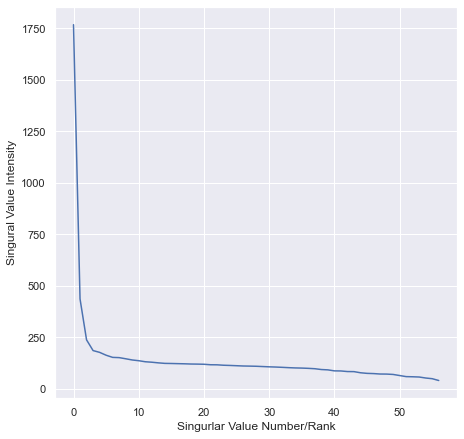

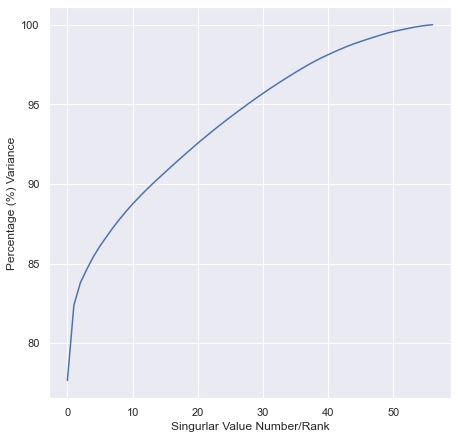

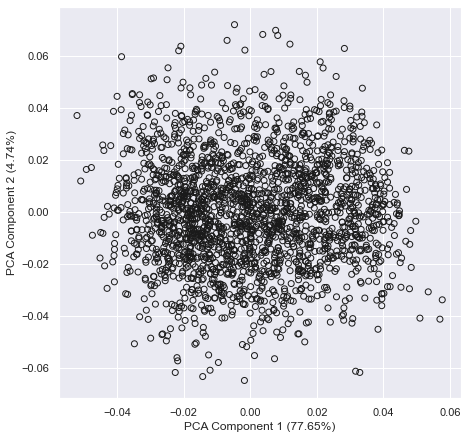

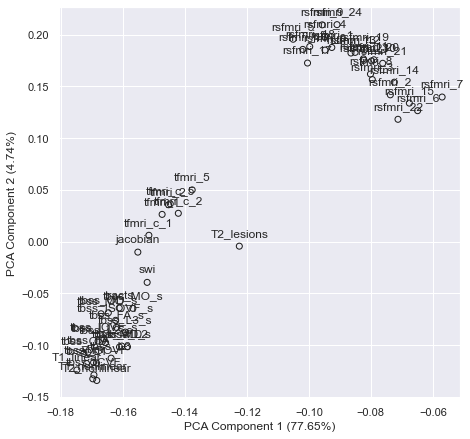

In [6]:
plot_PCA(df_train)

# RENT

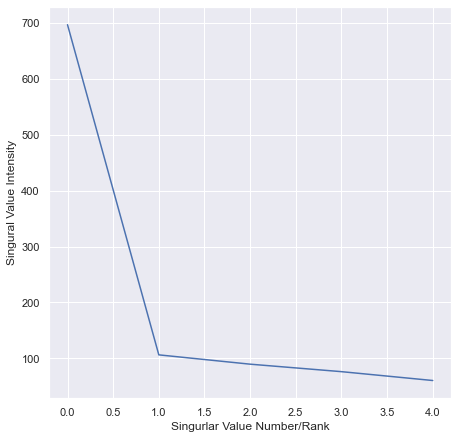

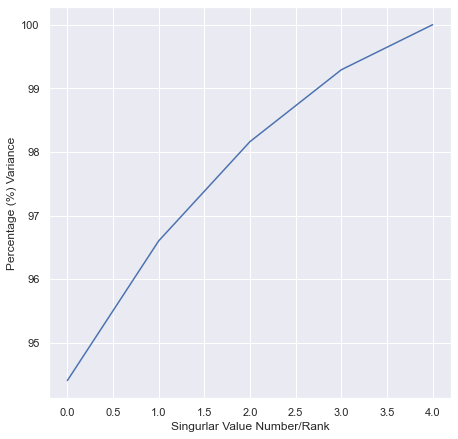

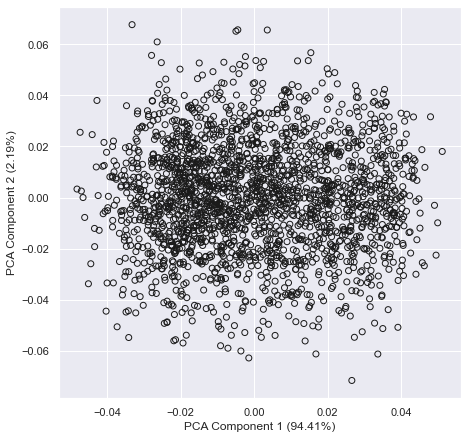

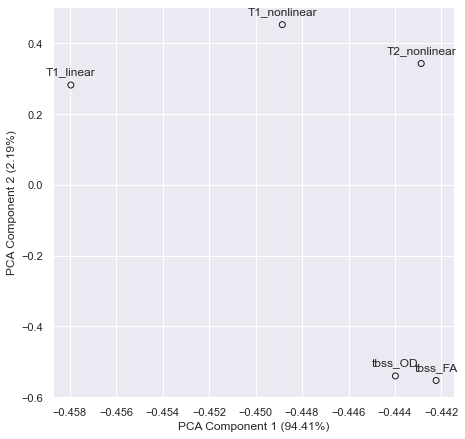

In [9]:
modalities = ['T1_nonlinear', 'T1_linear', 'T2_nonlinear', 'tbss_FA', 'tbss_OD']
plot_PCA(df_train, modalities)

# Clusters

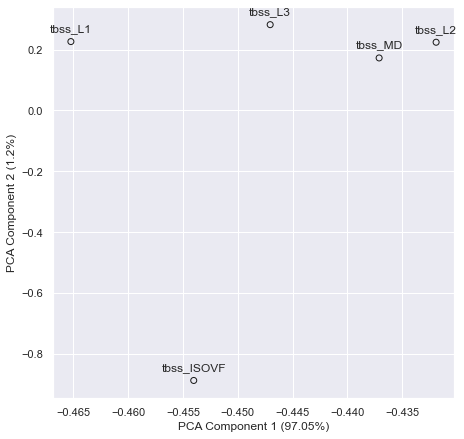

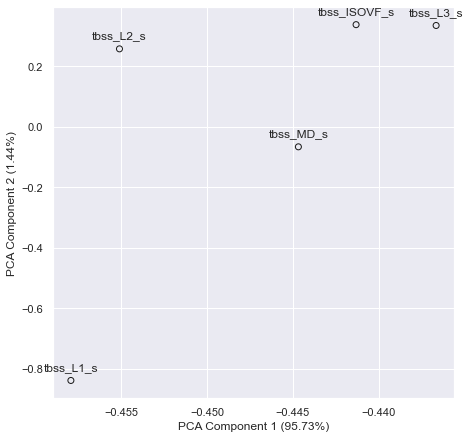

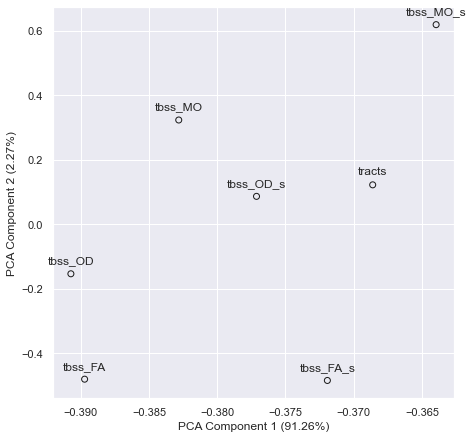

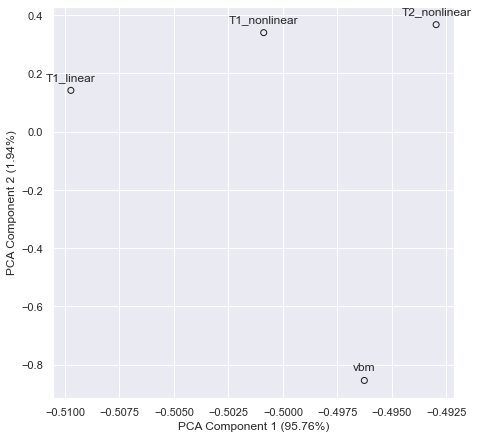

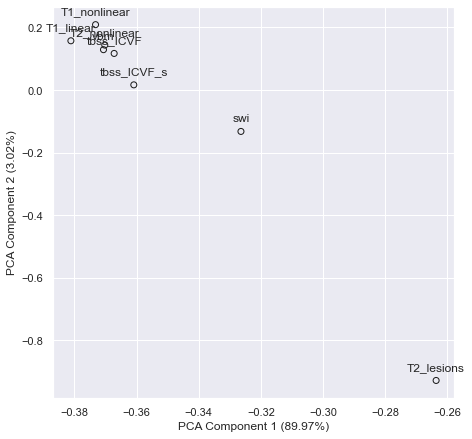

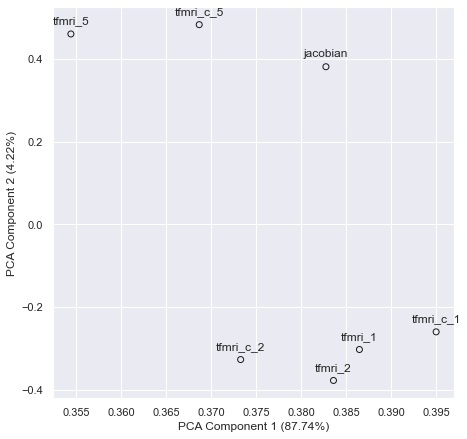

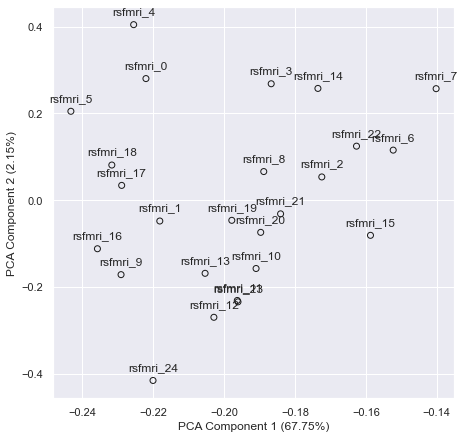

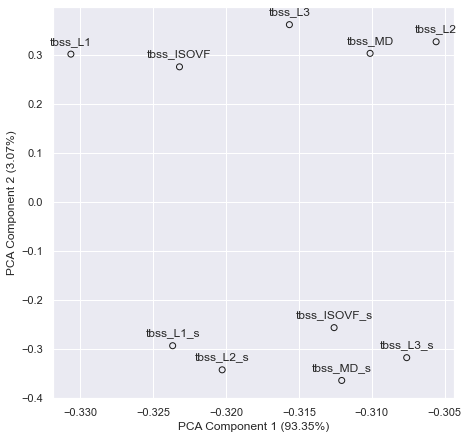

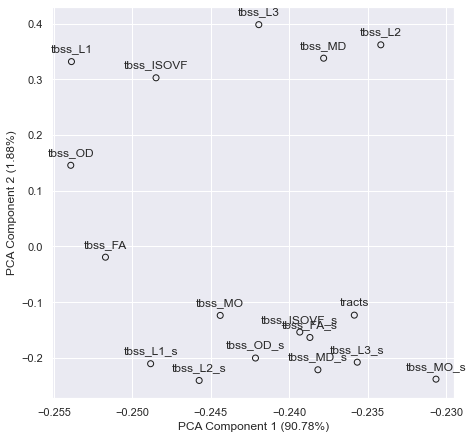

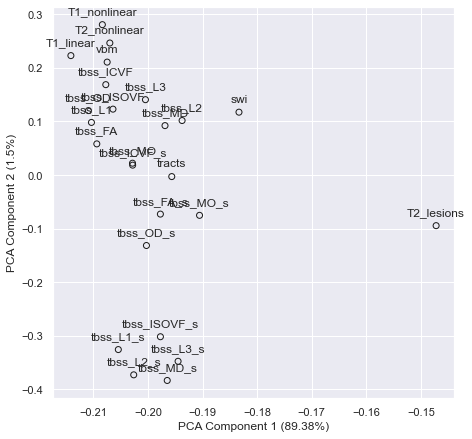

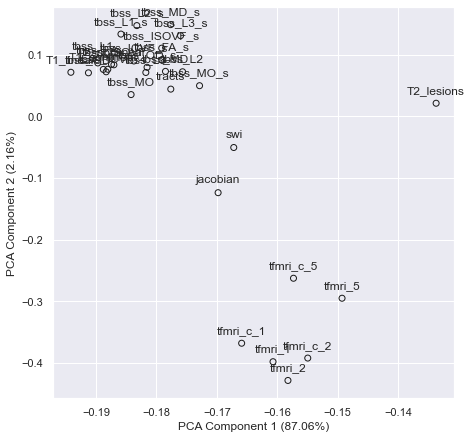

In [8]:
mods13 = ['rsfmri_0', 'rsfmri_16', 'rsfmri_6']
mods14 = ['rsfmri_2', 'rsfmri_17', 'rsfmri_21', 'rsfmri_5', 'rsfmri_9', 'rsfmri_13', 'rsfmri_20']
mods15 = ['rsfmri_1', 'rsfmri_7']
mods16 = mods13 + mods14 + mods15
mods17 = ['rsfmri_3', 'rsfmri_22', 'rsfmri_15', 'rsfmri_14']
mods18 = ['rsfmri_10', 'rsfmri_11', 'rsfmri_12', 'rsfmri_18']
mods19 = ['rsfmri_4', 'rsfmri_8', 'rsfmri_19', 'rsfmri_23', 'rsfmri_24']
mods20 = mods17 + mods18 + mods19
mods21 = mods16 + mods20

cluster1 = ['tbss_L2', 'tbss_MD', 'tbss_L3', 'tbss_L1', 'tbss_ISOVF']
cluster2 = ['tbss_ISOVF_s', 'tbss_L1_s', 'tbss_L2_s', 'tbss_L3_s', 'tbss_MD_s']
cluster3 = ['tracts', 'tbss_FA_s', 'tbss_FA', 'tbss_MO_s', 'tbss_MO', 'tbss_OD_s', 'tbss_OD']
cluster4 = ['T1_nonlinear', 'T1_linear', 'vbm', 'T2_nonlinear']
cluster5 = cluster4 + ['T2_lesions', 'swi', 'tbss_ICVF_s', 'tbss_ICVF']
cluster6 = ['jacobian', 'tfmri_5', 'tfmri_c_5', 'tfmri_1', 'tfmri_2', 'tfmri_c_1', 'tfmri_c_2']
cluster7 = mods21
cluster8 = cluster1 + cluster2
cluster9 = cluster8 + cluster3
cluster10 = cluster9 + cluster5
cluster11 = cluster10 + cluster6

mods = [cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9, cluster10,
       cluster11]

idx = 1
for mod in mods:
#     print(mod)
    plot_PCA(df_train, mod, only_clusters=True)
#     print('===========')